In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from pandas.api.types import CategoricalDtype

In [2]:
df=pd.read_csv('death_data/per_borough_gradient.csv')
df=df.rename(columns={"Total": "All"}, errors="raise")

In [3]:
df=df.drop(df.columns[[0]], axis=1) 

In [4]:
df

,Date,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
0,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-23,0.272727,0.227273,0.117647,0.290323,0.571429,0.262626
2,2020-03-24,0.464286,0.555556,0.578947,0.525000,0.636364,0.536000
3,2020-03-25,0.463415,0.523810,0.433333,0.508197,0.166667,0.458333
4,2020-03-26,0.333333,0.265625,0.279070,0.336957,0.238095,0.303571
5,2020-03-27,0.262500,0.259259,0.181818,0.211382,0.269231,0.232877
6,2020-03-28,0.504950,0.637255,0.430769,0.449664,0.303030,0.491111
7,2020-03-29,0.236842,0.107784,0.107527,0.171296,0.069767,0.154993
8,2020-03-30,0.143617,0.167568,0.155340,0.205534,0.260870,0.178065
9,2020-03-31,0.218605,0.208333,0.084034,0.232787,0.155172,0.199343


In [5]:
df=pd.melt(df, id_vars=['Date'], value_vars=['All','Bronx','Brooklyn','Manhattan','Queens', 'Staten Island'])

In [6]:
df=df.dropna()
df

,Date,variable,value
1,2020-03-23,All,0.262626
2,2020-03-24,All,0.536000
3,2020-03-25,All,0.458333
4,2020-03-26,All,0.303571
5,2020-03-27,All,0.232877
...,...,...,...
79,2020-03-31,Staten Island,0.155172
80,2020-04-01,Staten Island,0.089552
81,2020-04-02,Staten Island,0.068493
82,2020-04-03,Staten Island,0.230769


In [7]:
df=df.rename(columns={"variable": "Borough","value":"Death"}, errors="raise")
df

,Date,Borough,Death
1,2020-03-23,All,0.262626
2,2020-03-24,All,0.536000
3,2020-03-25,All,0.458333
4,2020-03-26,All,0.303571
5,2020-03-27,All,0.232877
...,...,...,...
79,2020-03-31,Staten Island,0.155172
80,2020-04-01,Staten Island,0.089552
81,2020-04-02,Staten Island,0.068493
82,2020-04-03,Staten Island,0.230769


In [8]:
p=(ggplot(df)         # defining what data to use
 + aes(x='Date',y='Death',group='Borough')    # defining what variable to use
 #+ geom_line(aes(color='Borough')) # defining the type of plot to use
 + geom_line(aes(color='Borough'))
 + geom_point(aes(color='Borough'))
 + labs(title='NYC Covid-19 Death per Borough', x='Date', y='Death')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)

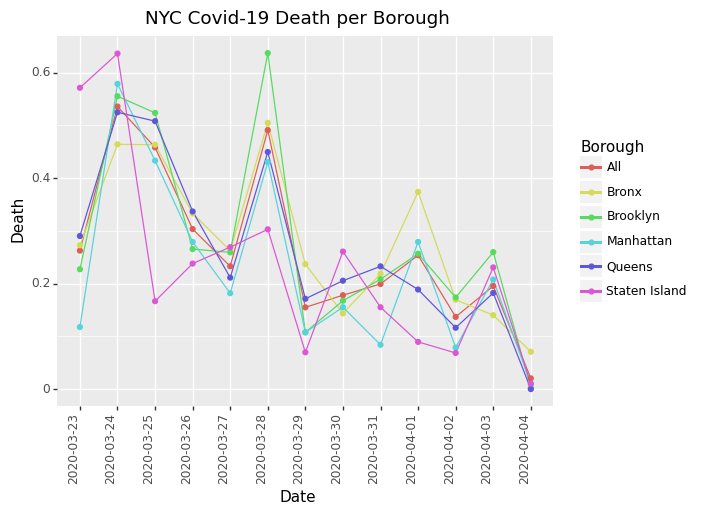

<ggplot: (-9223372029313868407)>

In [9]:
p

In [10]:
q=(ggplot(df)         # defining what data to use
 + aes(x='Date',y='Death',group='Borough',fill='Borough')    # defining what variable to use
 + geom_area(position = 'stack')
 + labs(title='NYC Covid-19 rate of change of death per borough', x='Date', y='')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1), 
         axis_text_y  = element_blank())
) # defining the type of plot to use

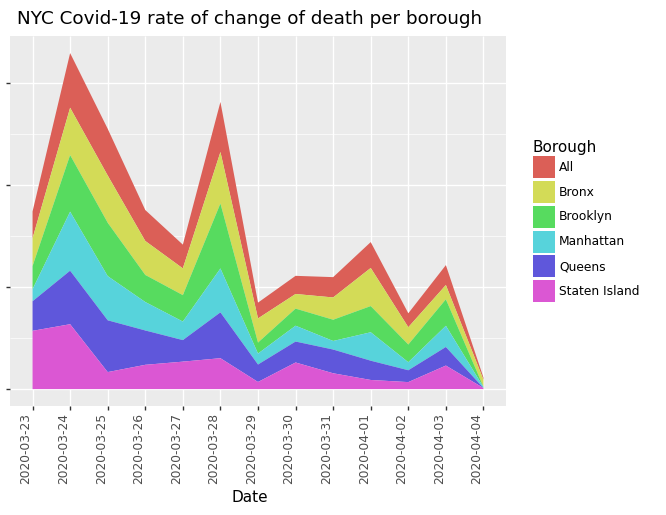

<ggplot: (-9223372029311518134)>

In [11]:
q

In [13]:
ggsave(p, filename = 'death_data/death_rate_by_borough.png')
ggsave(q, filename = 'death_data/death_rate_by_borough_stacked.png')

/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: death_data/death_rate_by_borough.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: death_data/death_rate_by_borough_stacked.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
